In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq

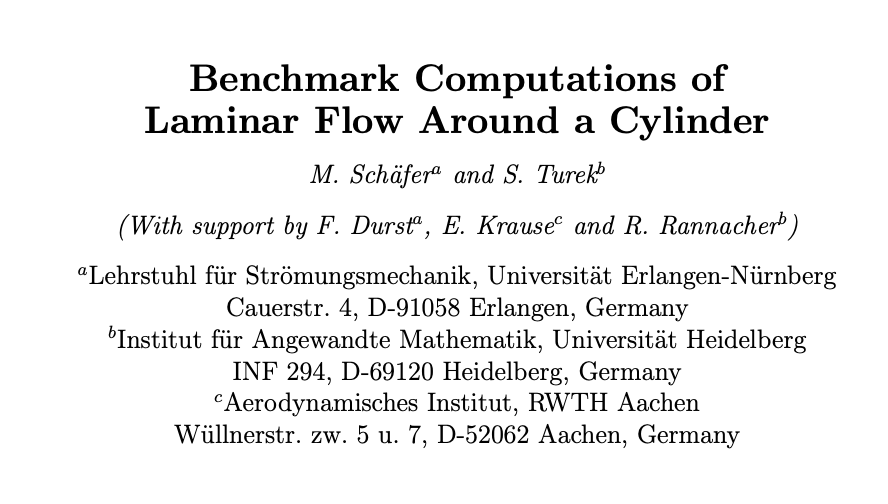

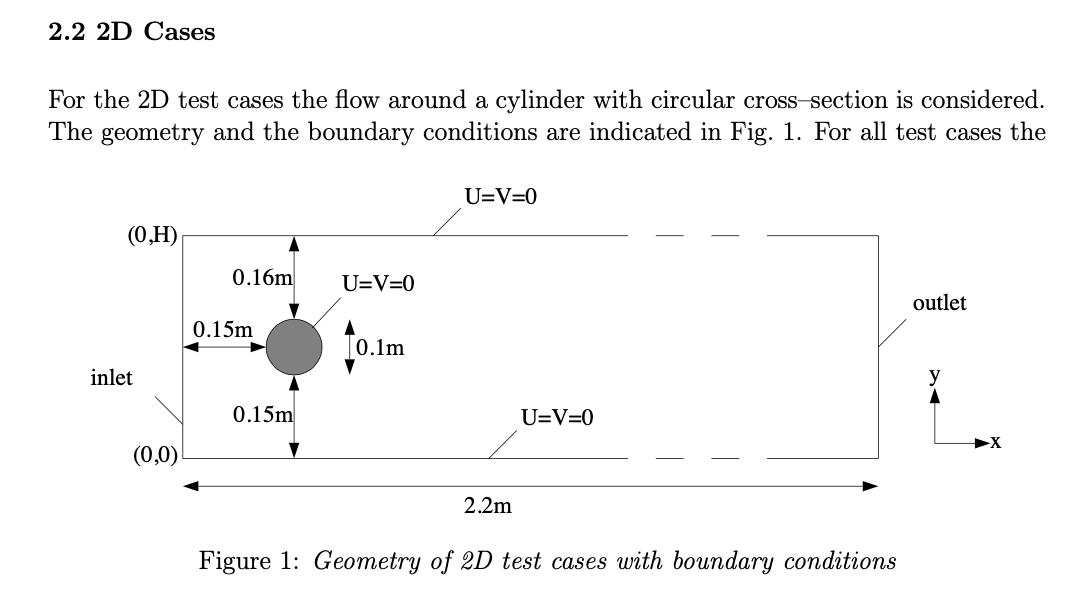

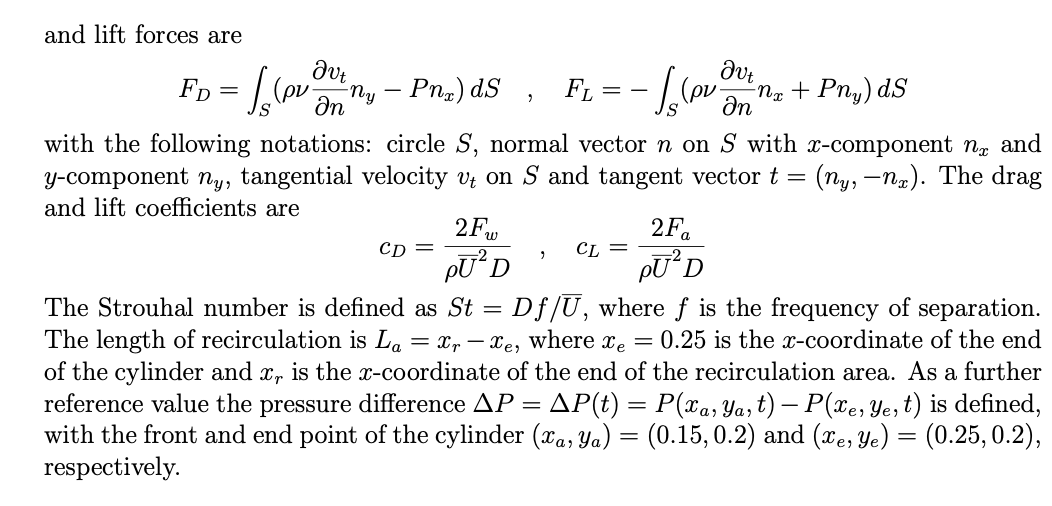

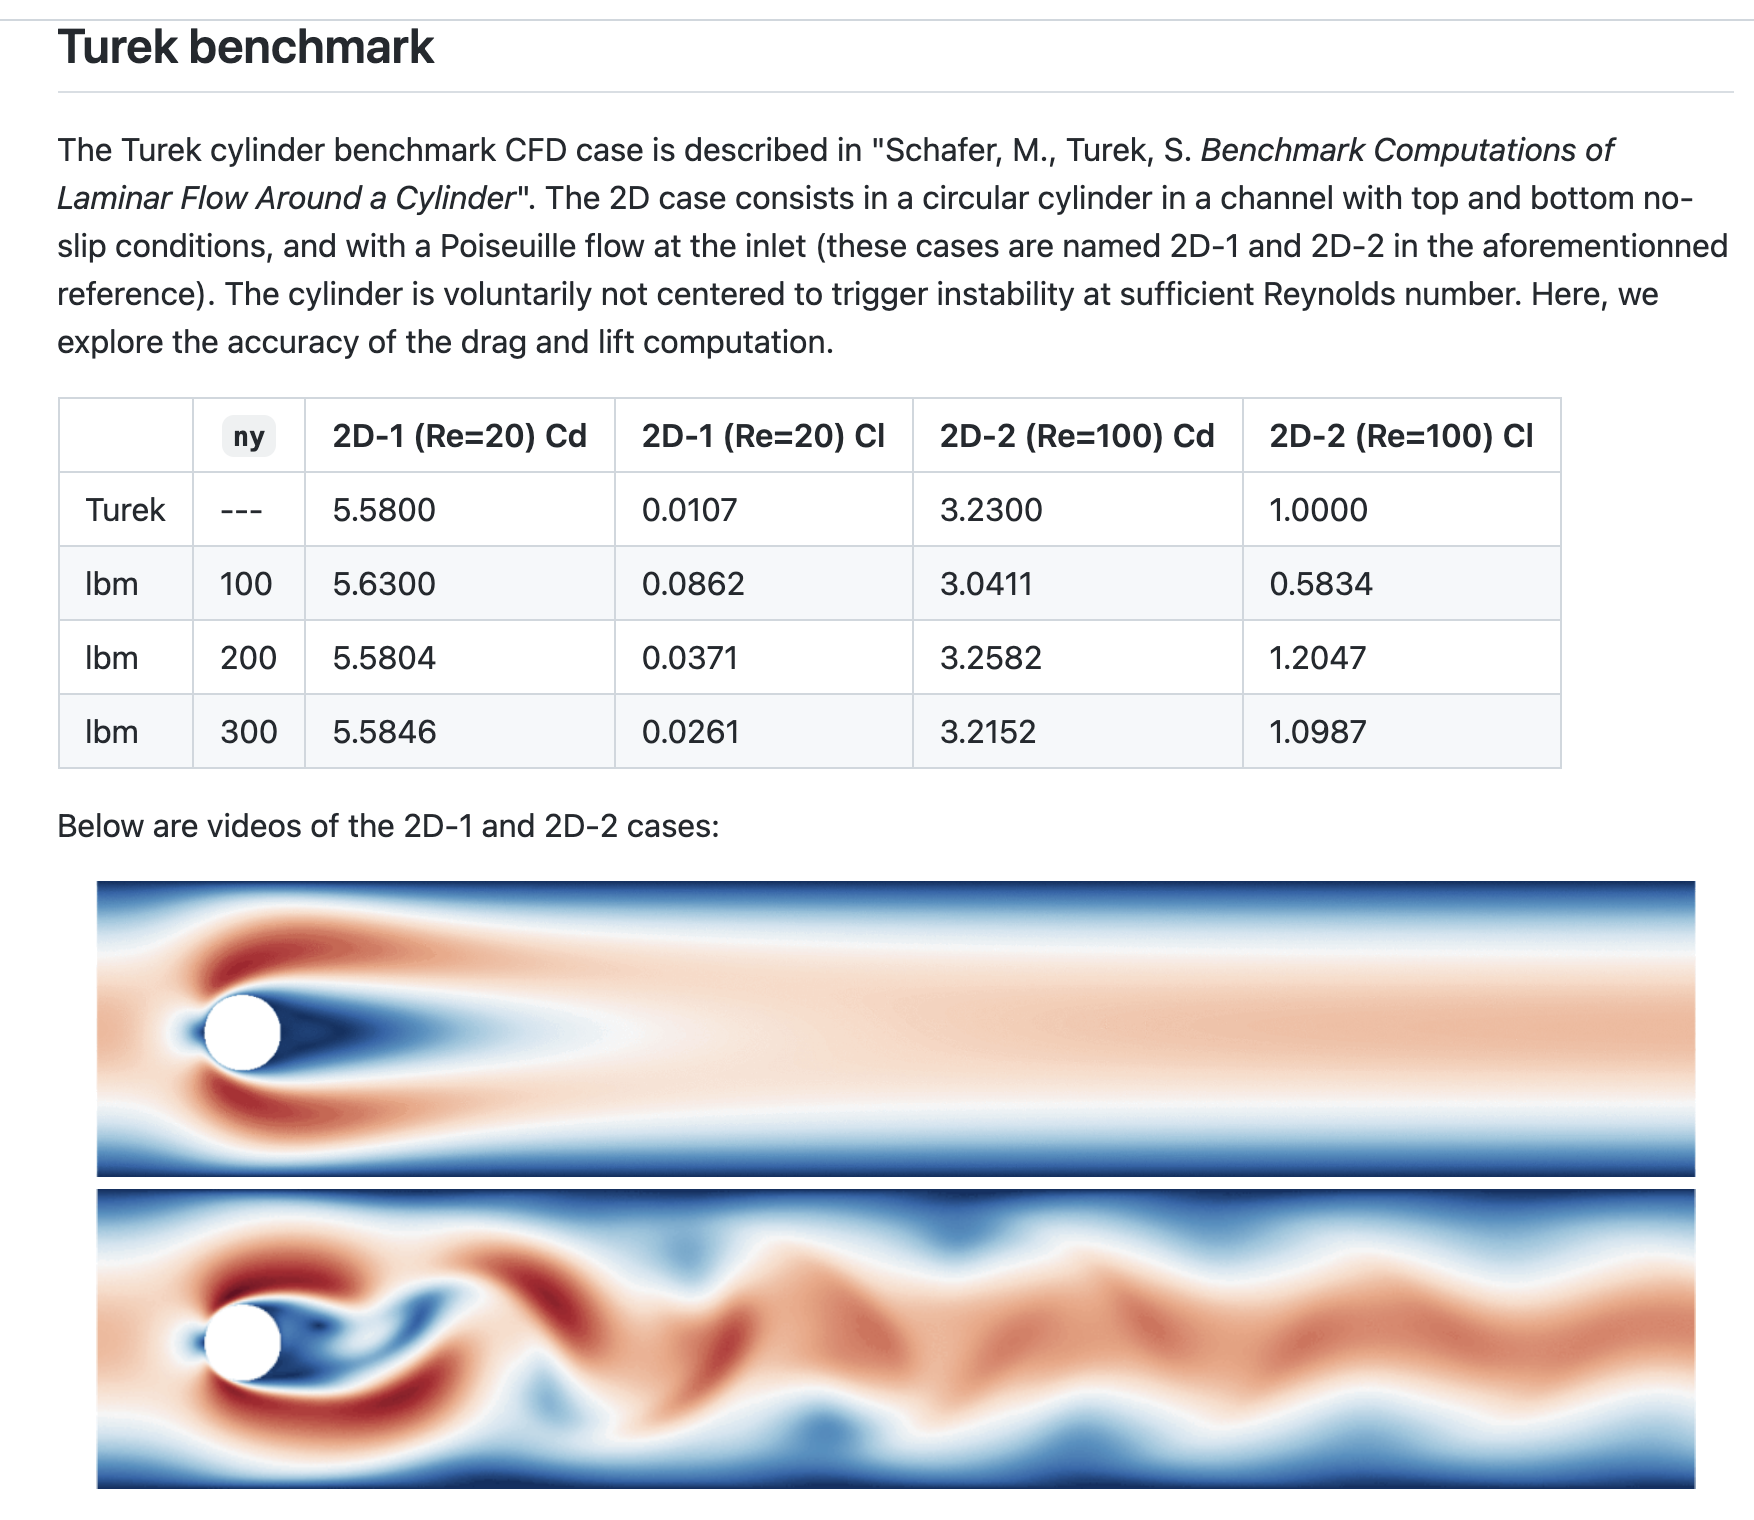

https://github.com/jviquerat/lbm

In [2]:
nombres = ['t','Cx','Cy','Cxa','Cya','dCx','dCy']
results = pd.read_csv('../figs/2021-10-15_15_33_11/drag_lift',header=None,
                      delim_whitespace=True,index_col=0,names=nombres)
results.head()

,Cx,Cy,Cxa,Cya,dCx,dCy
t,,,,,,
0.000000,1.850372e-13,5.782412e-15,0.0,0.0,0.0,0.0
0.000024,-0.000000e+00,-0.000000e+00,0.0,0.0,0.0,0.0
0.000048,1.850372e-13,1.445603e-14,0.0,0.0,0.0,0.0
0.000072,-0.000000e+00,-1.734723e-14,0.0,0.0,0.0,0.0
0.000096,1.850372e-13,7.228014e-15,0.0,0.0,0.0,0.0


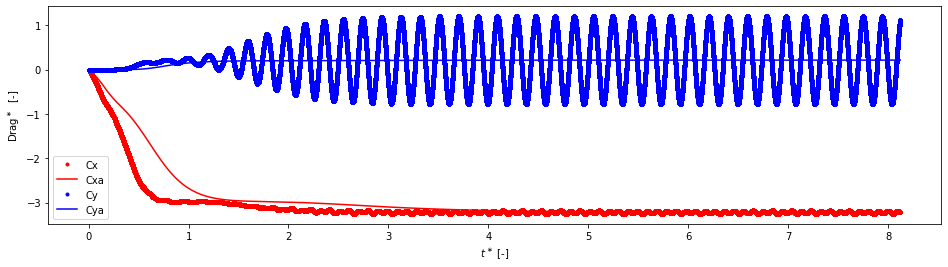

In [4]:
fig, ax  = plt.subplots(figsize=(16,4))
ax.plot(results.Cx,'r.',label='Cx')
ax.plot(results.Cxa,'r-',label='Cxa')
ax.plot(results.Cy,'b.',label='Cy')
ax.plot(results.Cya,'b-',label='Cya')

ax.set_xlabel('$t^\\ast$ [-]')
ax.set_ylabel('Drag$^\\ast$  [-]')
ax.legend()

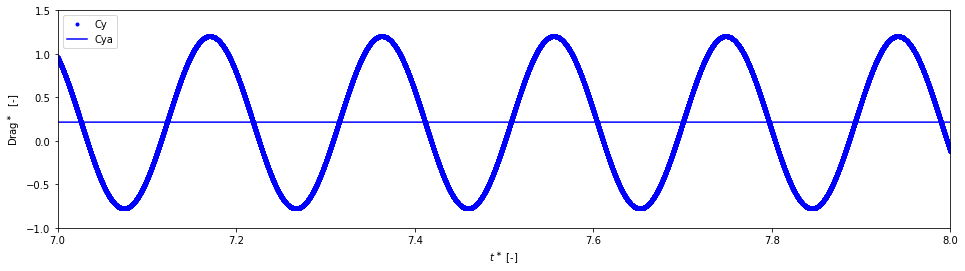

In [10]:
fig, ax  = plt.subplots(figsize=(16,4))
# ax.plot(results.Cx,'r.',label='Cx')
# ax.plot(results.Cxa,'r-',label='Cxa')
ax.plot(results.Cy,'b.',label='Cy')
ax.plot(results.Cya,'b-',label='Cya')

ax.set_xlabel('$t^\\ast$ [-]')
ax.set_ylabel('Drag$^\\ast$  [-]')
ax.set_ylim(-1,1.5)
ax.set_xlim(7,8)
ax.legend()

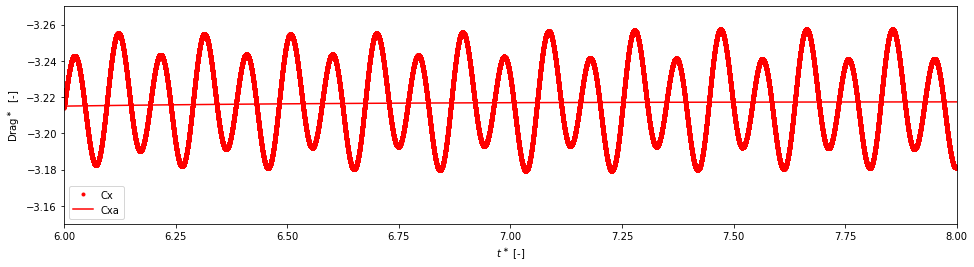

In [20]:
fig, ax  = plt.subplots(figsize=(16,4))
ax.plot(results.Cx,'r.',label='Cx')
ax.plot(results.Cxa,'r-',label='Cxa')
# ax.plot(results.Cy,'b.',label='Cy')
# ax.plot(results.Cya,'b-',label='Cya')

ax.set_xlabel('$t^\\ast$ [-]')
ax.set_ylabel('Drag$^\\ast$  [-]')
ax.set_ylim(-3.15,-3.27)
ax.set_xlim(6,8)
ax.legend()

Text(0, 0.5, 'Ao [-]')

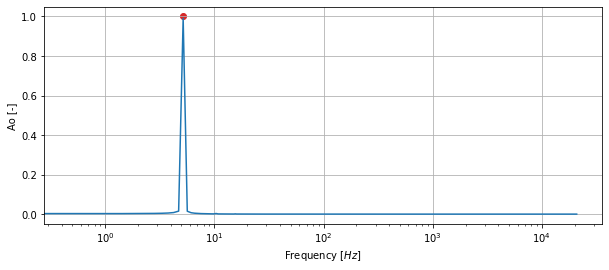

In [31]:
r = results[6:]
T = 0.000024
N = len(r.Cy)
yf = fft(np.array(r.Cy))
xf = fftfreq(N,T)[:N//2]

fig, ax = plt.subplots(figsize=(10,4))

ax.semilogx(xf, 2.0/N * np.abs(yf[0:N//2]))
ax.scatter(5.15,1,c='C3')

ax.grid()
ax.set_xlabel('Frequency [$Hz$]')
ax.set_ylabel('Ao [-]')

Text(0, 0.5, 'Drag$^\\ast$  [-]')

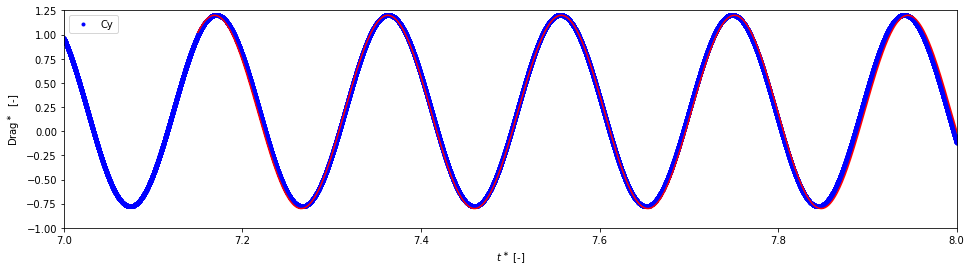

In [38]:
fig, ax  = plt.subplots(figsize=(16,4))


phi = 4.2 
x = np.linspace(7.15,8.1,1000)
y = 1.*np.sin(5.15 * 2.0*np.pi*x - phi)  + 0.2


ax.plot(results.Cy,'b.',label='Cy' )
ax.plot(x,y,'r-')


ax.set_xlim(7,8)
ax.set_ylim(-1,1.25)
ax.legend()
ax.set_xlabel('$t^\\ast$ [-]')
ax.set_ylabel('Drag$^\\ast$  [-]')

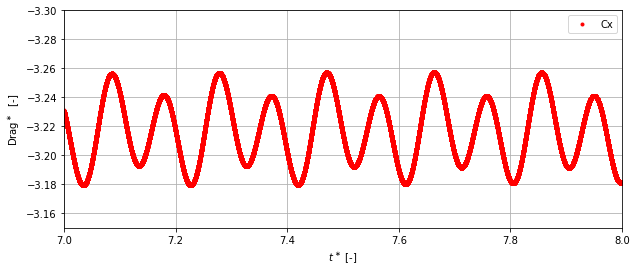

In [43]:
fig, ax  = plt.subplots(figsize=(10,4))
ax.plot(r.Cx,'r.',label='Cx')
ax.set_xlim(7,8)
ax.set_ylim(-3.15,-3.3)
ax.legend()


ax.set_xlabel('$t^\\ast$ [-]')
ax.set_ylabel('Drag$^\\ast$  [-]')
ax.grid()

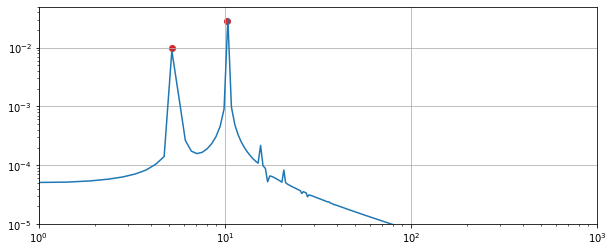

In [48]:
T = 0.000024
N = len(r.Cx)
yf = fft(np.array(r.Cx))
xf = fftfreq(N, T)[:N//2]


fig, ax  = plt.subplots(figsize=(10,4))
ax.loglog(xf, 2.0/N * np.abs(yf[0:N//2]))


ax.scatter(5.2,1e-2,c='C3')
ax.scatter(10.3,2.8e-2,c='C3')
ax.set_xlim(10e-1,10e2)
ax.set_ylim(10e-6,5e-2)
ax.grid()

(-3.15, -3.3)

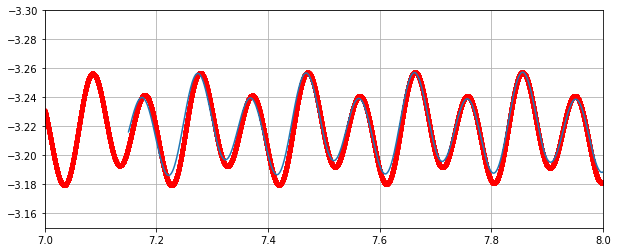

In [51]:
fig, ax  = plt.subplots(figsize=(10,4))
ax.plot(r.Cx,'r.',label='Cx')

phi = 1
x = np.linspace(7.15,8.1,1000)
y = 1e-2*np.sin(5.2 * 2.0*np.pi*x - phi) + 2.8e-2*np.sin(1.03e1 * 2.0*np.pi*x -phi)-3.22

ax.plot(x,y)
ax.grid()
ax.set_xlim(7,8)
ax.set_ylim(-3.15,-3.3)

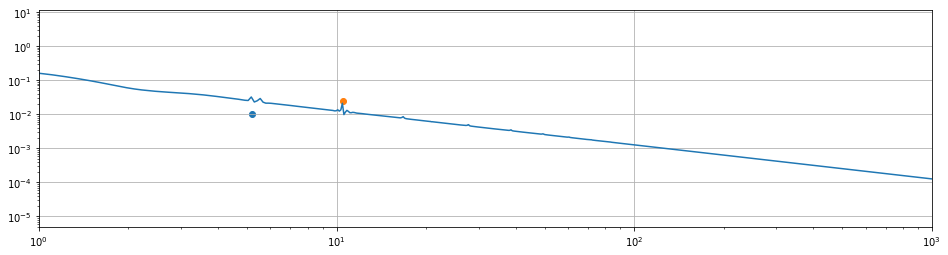

In [53]:
T = 0.000024
N = len(results.Cx)
yf = fft(np.array(results.Cx))
xf = fftfreq(N, T)[:N//2]
fig, ax  = plt.subplots(figsize=(16,4))

ax.loglog(xf, 2.0/N * np.abs(yf[0:N//2]))
ax.scatter(5.2e0,1e-2)
ax.scatter(1.05e1,2.4e-2)
ax.set_xlim(1,10e2)
ax.grid()


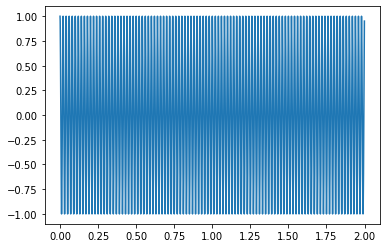

In [56]:

dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
x = np.cos(2*np.pi*t*f0)
plt.plot(t,x)

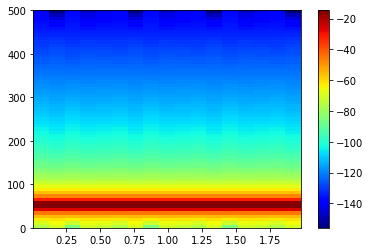

In [61]:
dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
x = np.cos(2*np.pi*t*f0)
plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=12,cmap='jet')
# plt.ylim(0,100)
plt.colorbar()
plt.show()

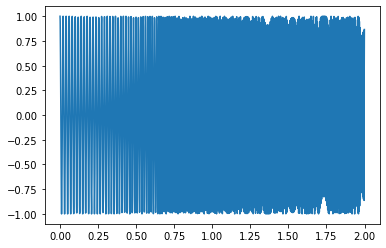

In [80]:

dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
f1 = 250
t1 = 2
x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t,2)/(3*t1**2)))
plt.plot(t,x)

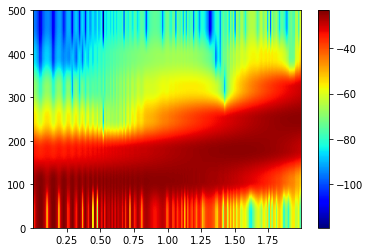

In [84]:

dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
f1 = 250
t1 = 2
plt.specgram(x, NFFT=12, Fs=1/dt, noverlap=1,cmap='jet')
plt.colorbar()
plt.show()

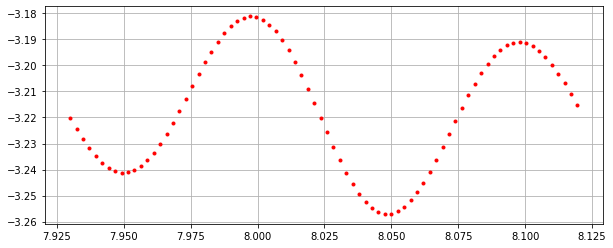

In [93]:
fig, ax  = plt.subplots(figsize=(10,4))
ax.plot(results.iloc[330415:338415:100].Cx,'r.',label='Cx')

ax.grid()

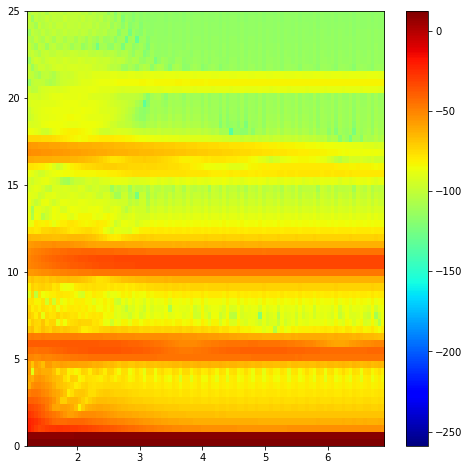

In [101]:
fig, ax = plt.subplots(figsize=(8,8))

dt = 0.0024


Pxx, freqs, bins, im  = ax.specgram(results[::100].Cx, 
                                    Fs=1/dt,cmap='jet',
                                    NFFT=1024,
                                    noverlap=1000)
ax.set_ylim(0,25)
fig.colorbar(im)

In [88]:
len(results)

338415